<a href="https://colab.research.google.com/github/shimgr/knn-vs-decision-tree-for-regression/blob/main/knn_vs_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data=pd.read_csv('advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
x= data[['TV','Radio','Newspaper']]

In [ ]:
y=data[['Sales']]

In [ ]:
(x_train, x_test, y_train, y_test)= train_test_split(x,y,test_size=0.2)
x_train

,TV,Radio,Newspaper
180,156.6,2.6,8.3
0,230.1,37.8,69.2
72,26.8,33.0,19.3
184,253.8,21.3,30.0
57,136.2,19.2,16.6
...,...,...,...
6,57.5,32.8,23.5
110,225.8,8.2,56.5
131,265.2,2.9,43.0
100,222.4,4.3,49.8


In [ ]:
x_train=x_train.apply(lambda x_train: ((x_train-np.mean(x_train))/np.std(x_train)))
x_test=x_test.apply(lambda x_test: ((x_test-np.mean(x_test))/np.std(x_test)))

In [ ]:
x_train

,TV,Radio,Newspaper
180,0.130697,-1.344009,-0.989186
0,0.993257,1.001873,1.715786
72,-1.392573,0.681980,-0.500603
184,1.271389,-0.097759,-0.025345
57,-0.108708,-0.237712,-0.620528
...,...,...,...
6,-1.032293,0.668651,-0.314053
110,0.942795,-0.970800,1.151695
131,1.405174,-1.324015,0.552071
100,0.902894,-1.230713,0.854104


In [ ]:
(x_train, x_valid, y_train, y_valid)= train_test_split(x_train,y_train,test_size=0.25)
x_train

,TV,Radio,Newspaper
24,-0.975962,-0.677565,-0.545020
124,0.986216,0.635329,1.937869
53,0.435820,1.561686,1.249412
155,-1.658969,-0.744209,-1.104669
194,0.049722,0.855256,-1.091344
...,...,...,...
56,-1.621416,0.355423,0.481004
191,-0.821053,-0.797525,-1.091344
73,-0.188509,-1.137411,0.032396
152,0.611853,0.035530,-0.727128


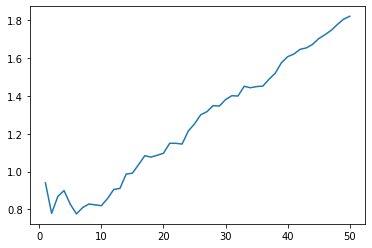

In [ ]:
neighbour= np.arange(1,51)
madknn=[]

for k in neighbour:
    knn=KNeighborsRegressor(n_neighbors=k, metric= 'euclidean')
    knn.fit(x_train, y_train)
    predicted_values_knn = knn.predict(x_valid)
    madknn.append(np.mean(abs(-predicted_values_knn+y_valid)))

plt.plot(neighbour,np.array(madknn))
plt.show()

In [ ]:
madknn[0:11]

[Sales    0.94
 dtype: float64, Sales    0.77875
 dtype: float64, Sales    0.868333
 dtype: float64, Sales    0.899375
 dtype: float64, Sales    0.827
 dtype: float64, Sales    0.775833
 dtype: float64, Sales    0.809643
 dtype: float64, Sales    0.828125
 dtype: float64, Sales    0.823889
 dtype: float64, Sales    0.81925
 dtype: float64, Sales    0.857045
 dtype: float64]

In [ ]:
#so apt value for k=2,6 with resp to mad

In [ ]:
knn=KNeighborsRegressor(n_neighbors=2, metric= 'euclidean')
knn.fit(x_train, y_train)
predicted_values_knn = knn.predict(x_test)
np.mean(abs(-predicted_values_knn+y_test))

Sales    1.19625
dtype: float64

In [ ]:
knn=KNeighborsRegressor(n_neighbors=6, metric= 'euclidean')
knn.fit(x_train, y_train)
predicted_values_knn = knn.predict(x_test)
np.mean(abs(-predicted_values_knn+y_test))

Sales    1.052917
dtype: float64

In [ ]:
#so k=6 is taken as optimum

In [ ]:
rmse_knn_test=(np.mean((-predicted_values_knn+y_test)**2))**0.5
mad_knn_test=np.mean(abs(-predicted_values_knn+y_test))
mape_knn_test=np.mean(abs(-predicted_values_knn/y_test+ 1))*100

In [ ]:
mape_knn_test

Sales    8.327893
dtype: float64

In [ ]:
depth = np.arange(1,51)
mad=[]
for i in depth:
  # create a model on train data
  regr_1 = DecisionTreeRegressor(max_depth=i)
    
  # fit the regressor with X and Y data
  regr_1.fit(x_train, y_train)
  predicted_values_dt = regr_1.predict(x_valid)
  mad.append(np.mean(abs(y_valid.Sales-predicted_values_dt)))


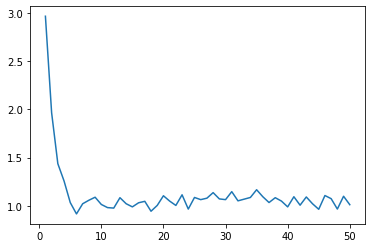

In [ ]:
plt.plot(depth,np.array(mad))
plt.show()

In [ ]:
mad[0:12]

[2.9633106229143493,
 1.9635937500000005,
 1.4368431372549018,
 1.2579271214896213,
 1.0345871212121218,
 0.9171468253968256,
 1.0223750000000003,
 1.05875,
 1.09,
 1.0150000000000001,
 0.9825000000000003,
 0.9775000000000004]

In [ ]:
#dept for 6 and 12 are optimum values for depth

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=6)
regr_1.fit(x_train, y_train)
predicted_values_dt = regr_1.predict(x_test)
np.mean(abs(y_test.Sales-predicted_values_dt))

1.2005466269841272

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=12)
regr_1.fit(x_train, y_train)
predicted_values_dt = regr_1.predict(x_test)
np.mean(abs(y_test.Sales-predicted_values_dt))

1.1949999999999998

In [ ]:
# so dept is taken as 12

In [ ]:
rmse_dt_test=(np.mean((-predicted_values_dt+y_test.Sales)**2))**0.5
mad_dt_test=np.mean(abs(-predicted_values_dt+y_test.Sales))
mape_dt_test=np.mean(abs(-predicted_values_dt/y_test.Sales+ 1))*100

In [ ]:
if rmse_dt_test < rmse_knn_test.Sales:
  print('Decision tree is better')
else:
  print('KNN is better')


KNN is better


In [ ]:
if mad_dt_test< mad_knn_test.Sales:
    print('Decision tree is better')
else:
    print('KNN is better')


KNN is better


In [ ]:
if mape_dt_test<mape_knn_test.Sales:
    print('Decision tree is better')
else:
    print('KNN is better')

KNN is better
